In [145]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [146]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [147]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


    IMPORT LIBRARIES:

In [148]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

READ DATA:


In [149]:
df.rename(columns={"sex": "gender"}, inplace=True)

In [150]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [151]:
df.shape

(1338, 7)

In [152]:
df.dtypes

,0
age,int64
gender,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [153]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [155]:
df.sample(10)

,age,gender,bmi,children,smoker,region,charges
1035,54,female,23.000,3,no,southwest,12094.47800
588,61,female,35.910,0,no,northeast,13635.63790
1001,24,male,32.700,0,yes,southwest,34472.84100
248,19,male,20.900,1,no,southwest,1832.09400
387,50,male,25.365,2,no,northwest,30284.64294
690,21,male,27.360,0,no,northeast,2104.11340
882,21,female,22.135,0,no,northeast,2585.85065
1193,48,female,36.575,0,no,northwest,8671.19125
306,28,female,27.500,2,no,southwest,20177.67113
1207,36,male,33.400,2,yes,southwest,38415.47400


In [156]:
df.isna().sum()

,0
age,0
gender,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [157]:
df.duplicated().sum()

1

DATA PROCESSING:

In [158]:
converted_gender = pd.get_dummies(df['gender'],drop_first=False,dtype='int')

In [159]:
converted_gender

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [160]:
df.gender.unique()

array(['female', 'male'], dtype=object)

In [161]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [162]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [163]:
region_values={"southwest":1,
             "southeast":2,
              "northwest":3,
              "northeast":4}

In [164]:
region_values

{'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4}

In [165]:
df["region_encodeing"]=df.region.map (region_values)

In [166]:
coverted_smoker = pd.get_dummies(df['smoker'],drop_first=False,dtype='int')
coverted_smoker

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1333,1,0
1334,1,0
1335,1,0
1336,1,0


In [167]:
df = pd.concat([df,coverted_smoker],axis=1)
df.head()

,age,gender,bmi,children,smoker,region,charges,region_encodeing,no,yes
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,1
1,18,male,33.770,1,no,southeast,1725.55230,2,1,0
2,28,male,33.000,3,no,southeast,4449.46200,2,1,0
3,33,male,22.705,0,no,northwest,21984.47061,3,1,0
4,32,male,28.880,0,no,northwest,3866.85520,3,1,0


In [168]:
mean_age = df['age'].mean()
mean_age

39.20702541106129

In [169]:
max_age = df['age'].max()
max_age


64

In [170]:
min_age = df['age'].min()
min_age

18

In [171]:
gender_counts = df['gender'].value_counts()
gender_counts

,count
gender,
male,676
female,662


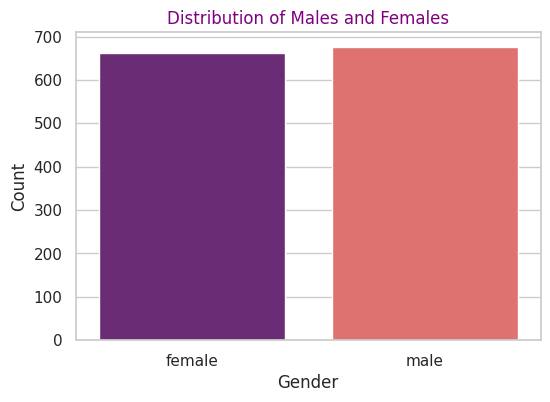

In [172]:
plt.figure(figsize=(6, 4))
plt.title('Distribution of Males and Females', color = 'purple')
sns.set(style='whitegrid')
sns.countplot(x='gender', data=df, palette='magma', hue='gender', dodge=False, legend=False)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

It's almost the same.

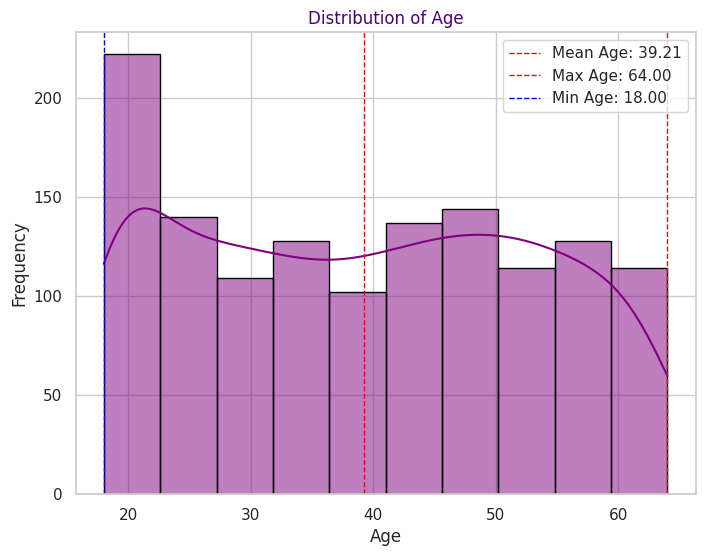

In [173]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=10, kde=True, edgecolor='black', alpha=0.5, color= 'purple')
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=1, label=f'Mean Age: {mean_age:.2f}')
plt.axvline(max_age, color='brown', linestyle='dashed', linewidth=1, label=f'Max Age: {max_age:.2f}')
plt.axvline(min_age, color='blue', linestyle='dashed', linewidth=1, label=f'Min Age: {min_age:.2f}')
plt.title('Distribution of Age', color = '#4B0082')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

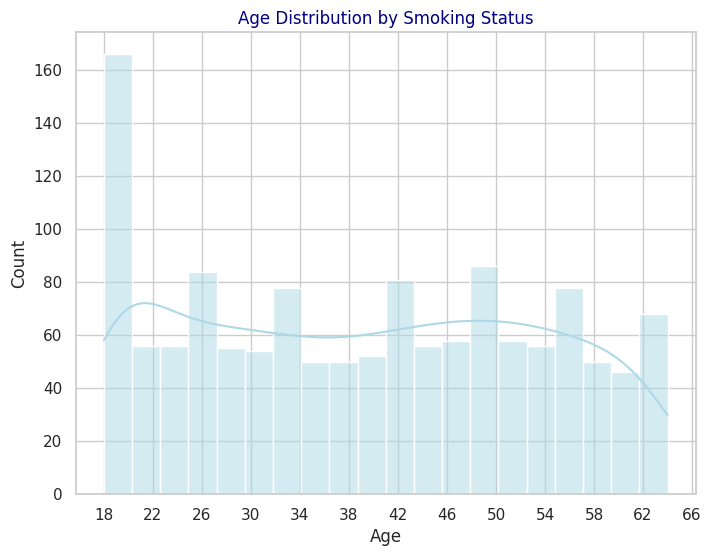

In [174]:
plt.figure(figsize=(8, 6))

sns.histplot(data=df, x='age', bins=20,color="lightblue",kde=True)

plt.title('Age Distribution by Smoking Status', color = 'navy')
plt.xlabel('Age')
plt.ylabel('Count')

plt.xticks(ticks=np.arange(df['age'].min(), df['age'].max()+4, step=4))


plt.show()

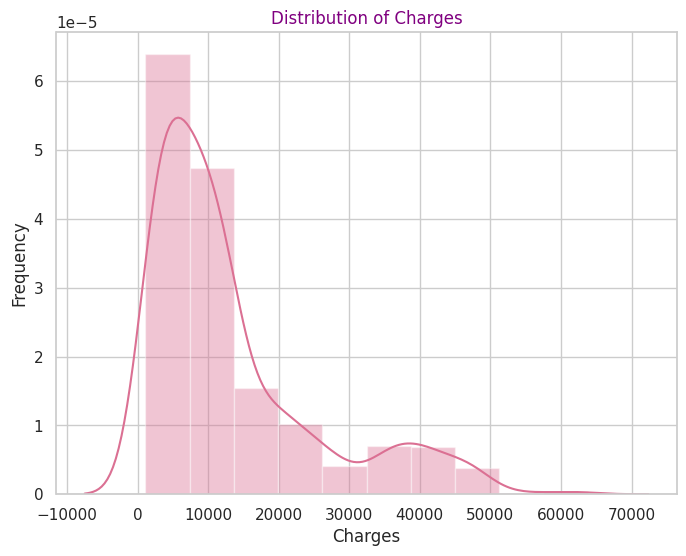

In [175]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(8, 6))
ax = sns.distplot(df['charges'], kde = True, color = 'palevioletred', bins = 10)
ax.set(xlabel='Charges', ylabel='Frequency')
plt.title('Distribution of Charges', color = 'purple')
plt.show()

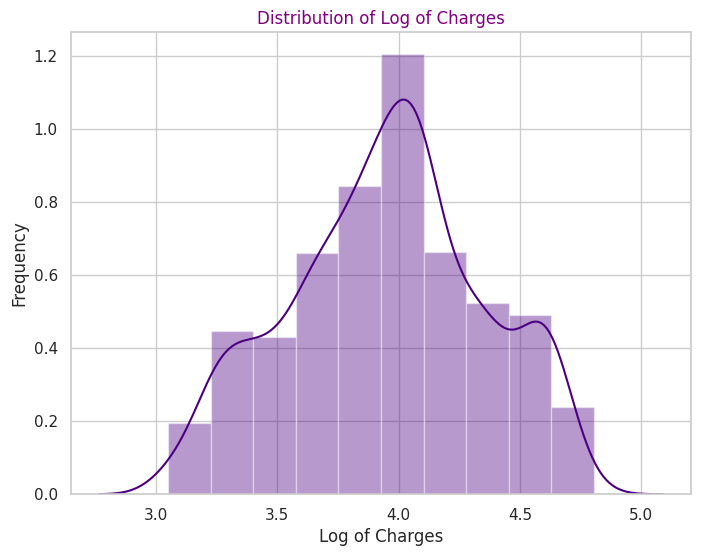

In [176]:
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'indigo', bins = 10)
ax.set(xlabel='Log of Charges', ylabel='Frequency')
plt.title('Distribution of Log of Charges', color = 'purple')
plt.show()

In [177]:
mean_bmi = df['bmi'].mean()
max_bmi = df['bmi'].max()
min_bmi = df['bmi'].min()

mean_absolute_error = df['bmi'].mean()
max_absolute_error = df['bmi'].max()
min_absolute_error = df['bmi'].min()

mean_bmi, max_bmi, min_bmi, mean_absolute_error, max_absolute_error, min_absolute_error

(30.66339686098655, 53.13, 15.96, 30.66339686098655, 53.13, 15.96)

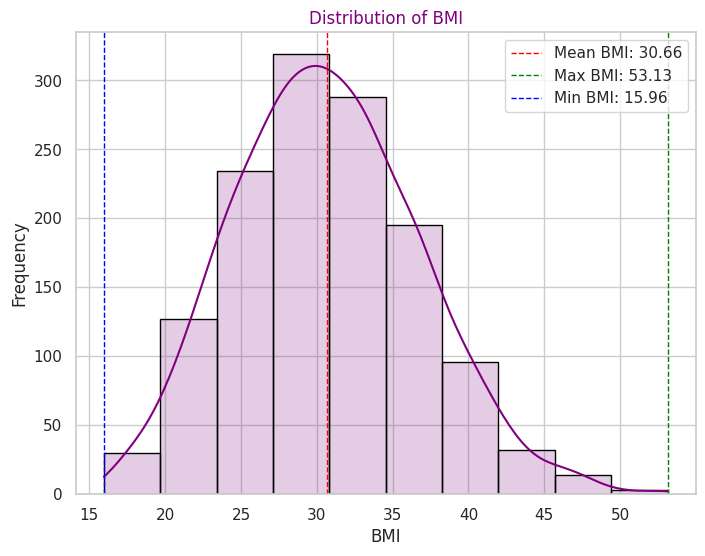

In [178]:
plt.figure(figsize=(8, 6))
sns.histplot(df['bmi'], bins=10, kde=True, edgecolor='black',alpha=0.2, color = 'purple')
plt.axvline(mean_bmi, color='red', linestyle='dashed', linewidth=1, label=f'Mean BMI: {mean_bmi:.2f}')
plt.axvline(max_bmi, color='green', linestyle='dashed', linewidth=1, label=f'Max BMI: {max_bmi:.2f}')
plt.axvline(min_bmi, color='blue', linestyle='dashed', linewidth=1, label=f'Min BMI: {min_bmi:.2f}')
plt.title('Distribution of BMI', color = 'purple')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

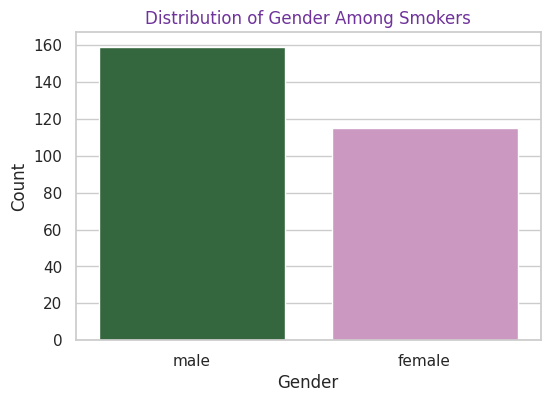

In [179]:
smokers_by_sex = df['gender'][df['smoker'] == "yes"].value_counts()

# Plotting the bar plot
plt.figure(figsize=(6,4))
sns.barplot(x=smokers_by_sex.index, y=smokers_by_sex.values, hue = smokers_by_sex.index, palette = 'cubehelix', legend=False)
plt.title('Distribution of Gender Among Smokers', color = 'indigo', alpha = 0.8)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
smokers_by_sex = df['gender'][df['smoker'] == "yes"].value_counts()



Males tend to smoke more than females.

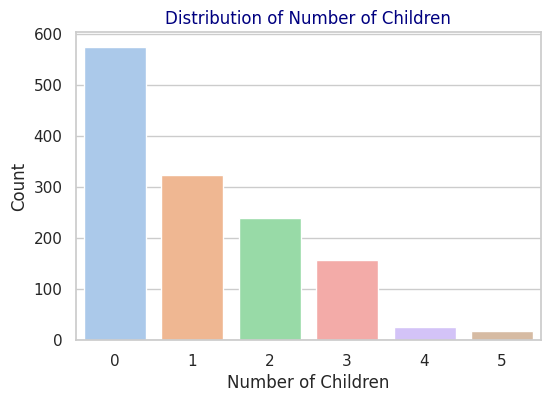

In [180]:
children_counts = df['children'].value_counts()

children_counts = children_counts.sort_index()

# Plotting the bar plot
plt.figure(figsize=(6,4))
sns.barplot(x=children_counts.index, y=children_counts.values, hue=children_counts.index, palette='pastel', legend=False)
plt.title('Distribution of Number of Children', color = 'navy')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()


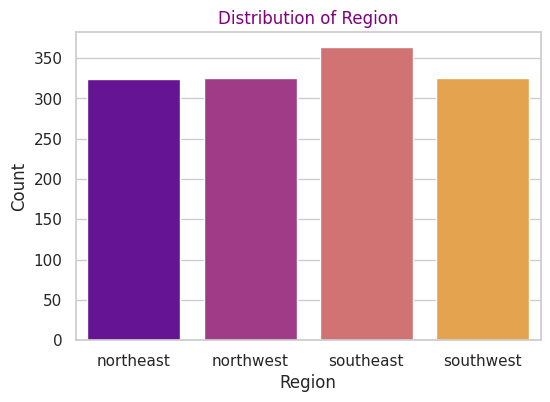

In [181]:
regieon_counts = df['region'].value_counts()

regieon_counts = regieon_counts.sort_index()

# Plotting the bar plot
plt.figure(figsize=(6,4))
sns.barplot(x=regieon_counts.index, y=regieon_counts.values, hue=regieon_counts.index, palette='plasma', legend=False)
plt.title('Distribution of Region', color = 'purple', alpha = 1)
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

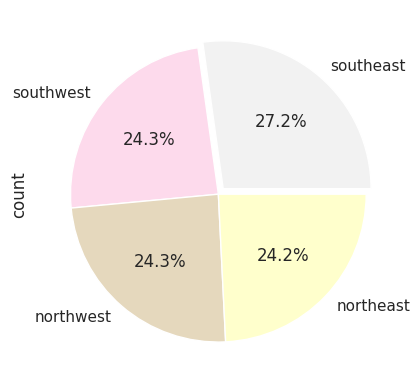

In [182]:
colors = plt.get_cmap('Pastel1_r').colors
df.region.value_counts().plot(kind ="pie" , autopct='%1.1f%%', colors=colors, explode=(0.05 , 0,0,0));

It appears that individuals in the Northwest region have higher medical insurance charges compared to other regions.

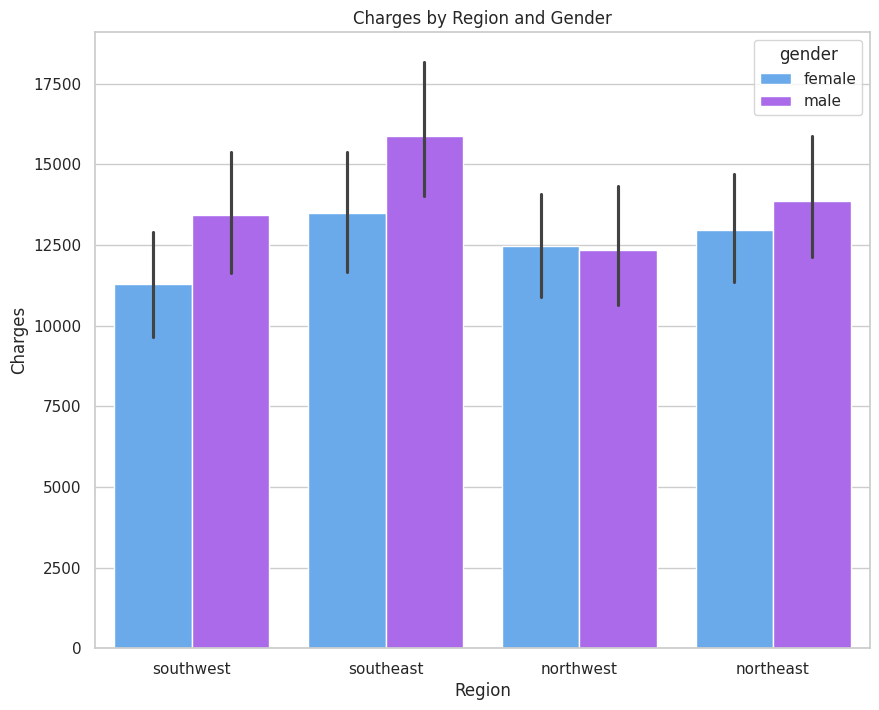

In [183]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))
ax = sns.barplot(x='region', y='charges', hue='gender', data=df, palette='cool')
ax.set(xlabel='Region', ylabel='Charges', title='Charges by Region and Gender')
plt.show()

[Text(0.5, 0, 'Region'),
 Text(0, 0.5, 'Charges'),
 Text(0.5, 1.0, 'Charges by Region and Number of Children')]

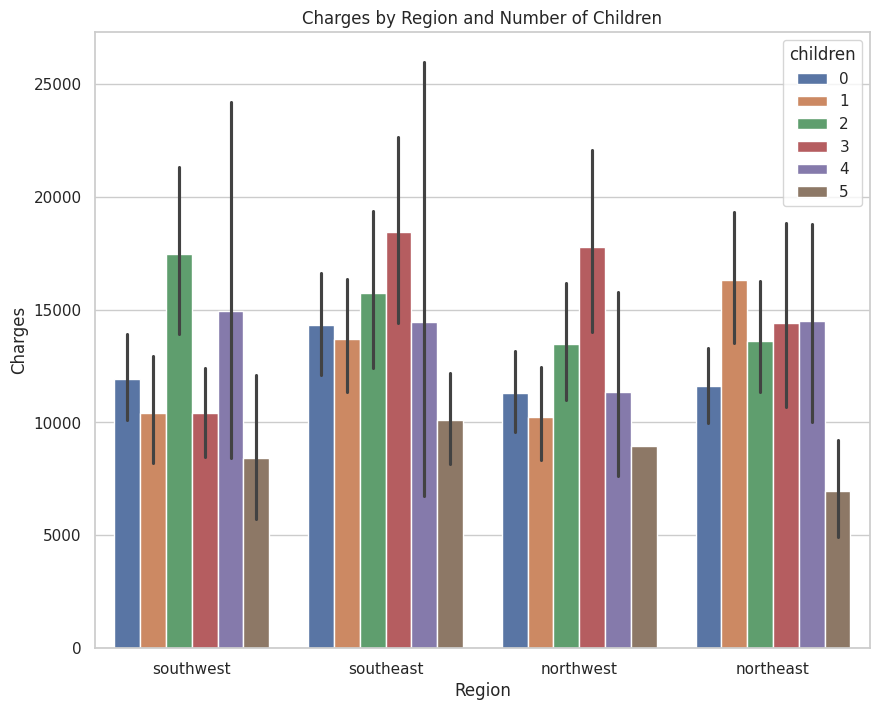

In [184]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='deep')
ax.set(xlabel='Region', ylabel='Charges', title='Charges by Region and Number of Children')

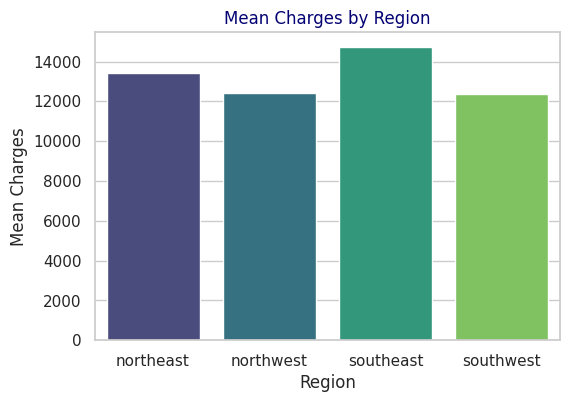

In [185]:
mean_charges_by_region = df.groupby('region')['charges'].mean().reset_index()

# Plotting the bar plot
plt.figure(figsize=(6,4))
sns.barplot(x='region', y='charges', hue='region', data=mean_charges_by_region, palette='viridis', legend=False)
plt.title('Mean Charges by Region', color = '#040273', alpha = 1)
plt.xlabel('Region')
plt.ylabel('Mean Charges')
plt.show()


The Southeast region stands out with the highest average insurance charges. However, this may be partly explained by the larger population in this region compared to others. While the higher charges in the Southeast could be influenced by this demographic factor, it’s important to recognize that other variables likely play a role as well, which we will explore in the following steps. A key indicator of this complexity is the Northeast region. Despite having a similar population size to the other two regions, its average charges are slightly higher, suggesting factors beyond population size are influencing costs.

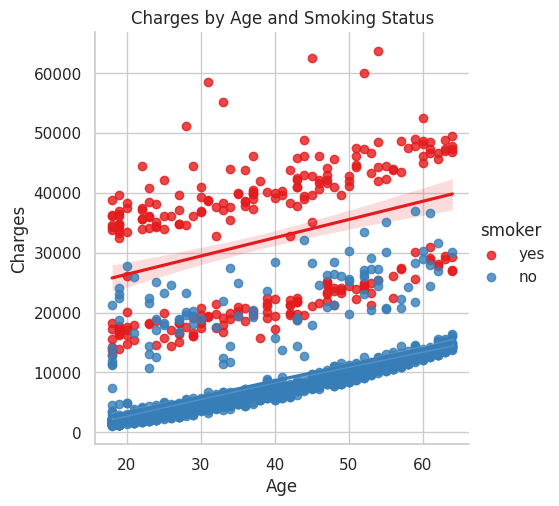

In [186]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax.set(xlabel='Age', ylabel='Charges', title='Charges by Age and Smoking Status')
plt.show()


Age and Charges:
For both smokers and non-smokers, charges tend to increase with age. However, the increase is much more pronounced for smokers.
For non-smokers, even at older ages (50-60 years), the charges remain relatively low compared to smokers.


Distribution of Charges:
Non-smokers seem to have a more consistent and lower range of charges, staying mostly under 20,000.
Smokers, on the other hand, have a wider spread of charges, with many individuals having charges exceeding 30,000 and even 50,000.


Smoking significantly increases healthcare charges, and this increase becomes more pronounced with age.
While both smoking status and age influence charges, smoking appears to have a much larger impact on the overall cost, leading to dramatically higher expenses for smokers compared to non-smokers.

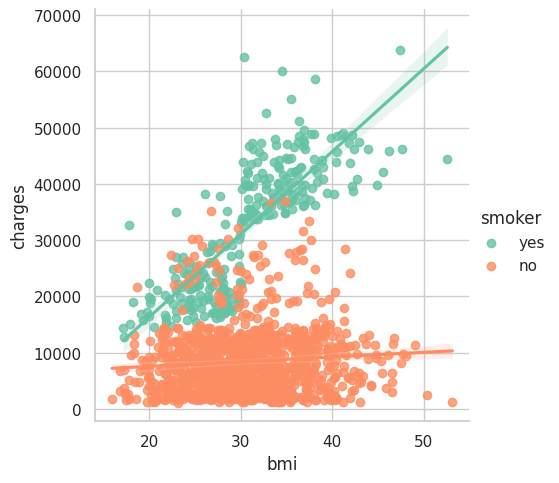

In [187]:
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')

Smokers (green) generally have higher charges than non-smokers (orange) across all BMI levels.
Charges increase with higher BMI for both groups, but the increase is significantly more pronounced for smokers.
Non-smokers tend to have a relatively flat charge range, mostly under 10,000, regardless of BMI, while smokers' charges rise sharply with increasing BMI, often exceeding 40,000 or more.
BMI and smoking together create a compounding effect, leading to much higher medical charges for smokers with higher BMI compared to non-smokers.

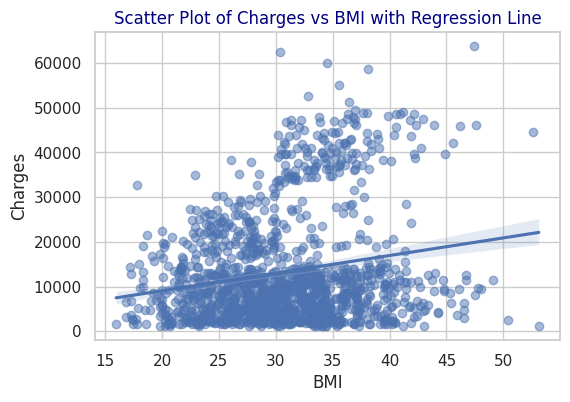

In [188]:
plt.figure(figsize=(6, 4))
sns.regplot(x='bmi', y='charges', data = df, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot of Charges vs BMI with Regression Line', color = 'navy')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

We can notice that the higher the ideal weight (BMI), the higher the average charges.

In [189]:
label = LabelEncoder()
df['gender_encoded'] = label.fit_transform(df['gender'])
df.gender = label.transform(df.gender)
label.fit(df.smoker)
df.smoker = label.transform(df.smoker)
label.fit(df.region)
df.region = label.transform(df.region)

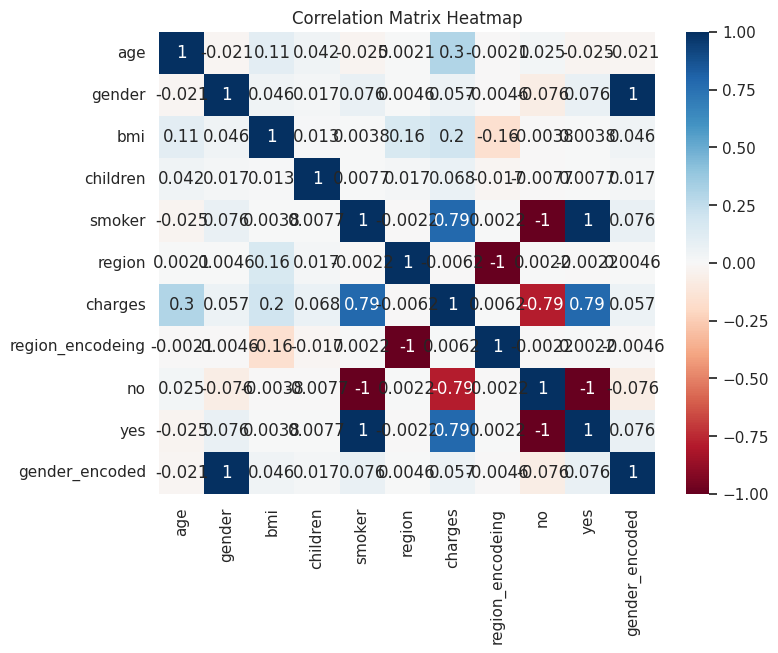

In [190]:
corr_matrix = df.corr()
df['gender'] = label.fit_transform(df['gender'])


# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap= 'RdBu', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

Model Fitting:


In [191]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

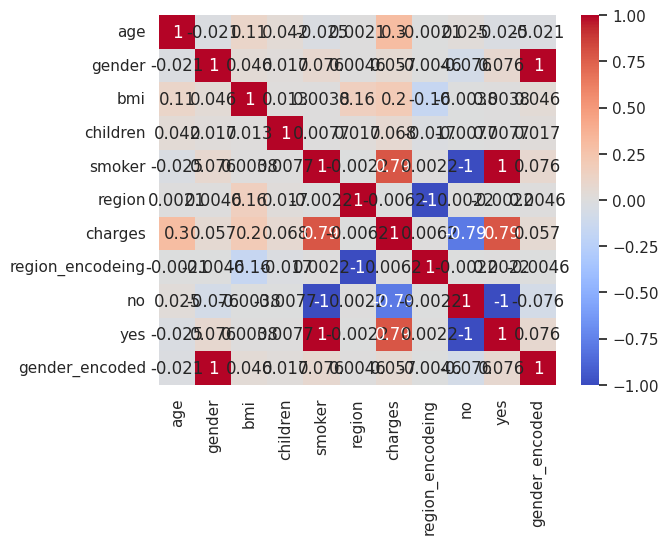

In [192]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [193]:
df.isnull().sum()

,0
age,0
gender,0
bmi,0
children,0
smoker,0
region,0
charges,0
region_encodeing,0
no,0
yes,0


In [194]:
df.head(8)

,age,gender,bmi,children,smoker,region,charges,region_encodeing,no,yes,gender_encoded
0,19,0,27.900,0,1,3,16884.92400,1,0,1,0
1,18,1,33.770,1,0,2,1725.55230,2,1,0,1
2,28,1,33.000,3,0,2,4449.46200,2,1,0,1
3,33,1,22.705,0,0,1,21984.47061,3,1,0,1
4,32,1,28.880,0,0,1,3866.85520,3,1,0,1
5,31,0,25.740,0,0,2,3756.62160,2,1,0,0
6,46,0,33.440,1,0,2,8240.58960,2,1,0,0
7,37,0,27.740,3,0,1,7281.50560,3,1,0,0


In [195]:
X = df.iloc[:, [0, 1, 2, 3, 5, 6]]
y = df.iloc[:, 4]

In [196]:
X.head()

,age,gender,bmi,children,region,charges
0,19,0,27.900,0,3,16884.92400
1,18,1,33.770,1,2,1725.55230
2,28,1,33.000,3,2,4449.46200
3,33,1,22.705,0,1,21984.47061
4,32,1,28.880,0,1,3866.85520


In [197]:
y.head()

,smoker
0,1
1,0
2,0
3,0
4,0


In [198]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [199]:
X = df.drop('smoker', axis=1)  # Features
y = df['smoker']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [200]:
X_train

array([[ 0.48366788, -1.0105187 , -1.75747362,  0.75107928, -0.46691549,
        -0.3367551 ],
       [ 0.55486907, -1.0105187 , -1.04059924, -0.90861367, -1.37232554,
        -0.391207  ],
       [ 0.91087502, -1.0105187 , -0.95201522, -0.90861367,  0.43849455,
         1.14390886],
       ...,
       [ 1.33808216,  0.98959079, -0.90034121, -0.90861367, -1.37232554,
        -0.11063555],
       [-0.15714284, -1.0105187 ,  2.77835626,  0.75107928,  1.34390459,
         2.71307501],
       [ 1.12447859,  0.98959079, -0.12523104, -0.90861367,  1.34390459,
        -0.25242989]])

In [201]:
y_train

,smoker
560,0
1285,0
1142,0
969,0
486,0
...,...
1095,0
1130,0
1294,0
860,1


In [202]:
model = LinearRegression()

In [203]:
model.fit(X_train, y_train)

LinearRegression()

In [204]:
y_pred = model.predict(X_test)

In [205]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [206]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.041531185348067656
R-squared: 0.7418712481447203


In [207]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_scaled, y, cv=5, scoring="r2")
print("Cross-Validation R2 Scores:", scores)
print("Mean Cross-Validation R2 Score:", np.mean(scores))

Cross-Validation R2 Scores: [0.7274622  0.66145529 0.75584704 0.69022386 0.73218197]
Mean Cross-Validation R2 Score: 0.713434070076359


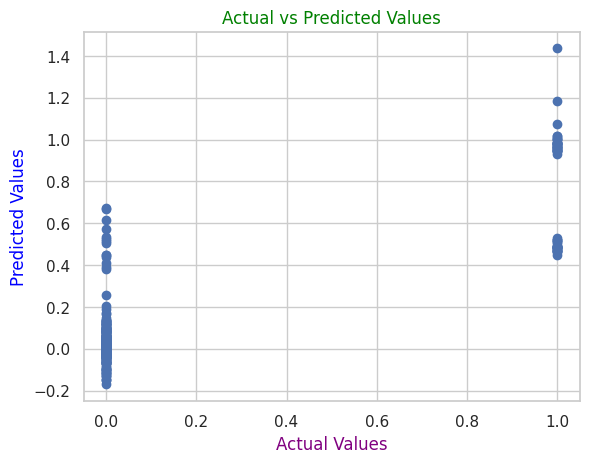

In [208]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values", color='purple')
plt.ylabel("Predicted Values", color='blue')
plt.title("Actual vs Predicted Values", color='green')
plt.show()